## Anastasia Nikiforova

# How to submit the code
- Create a github account called `programming_test`
- Check in the code like you would develop normally in `master`

# Language
- Please use jupyter notebooks and python (preferably 2.7, but it 3.x is fine)
- If you make assumptions please document them clearly and explain why you made those assumptions
- Use libraries (`matplotlib`, `numpy`, `pandas`, `scipy`, `statsmodel`, `seaborn`) as much as possible
- Feel free to check Wikipedia for all the definitions
- Each questions is really open-ended and can be approached at many different levels of complexity
- Do not use frameworks like https://drivendata.github.io/cookiecutter-data-science/
- Please don't spend more than 6 hours on this test

# Questions

## Question 1

- Download daily stock prices for 3 stocks (e.g., Apple (AAPL), Google (GOOG), Facebook (FB)) for the last 10 years from AlphaVantage, Quandl, Yahoo, Google Finance or anywhere else

- Refs:
- https://www.alphavantage.co/documentation/
- https://blog.quandl.com/api-for-stock-data
- https://www.quora.com/What-are-some-good-APIs-to-get-..

- You can use close prices

In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
start_date = '2008-06-05'
end_date = '2018-06-05'

apple = data.DataReader('AAPL', 'quandl', start_date, end_date)
google = data.DataReader('GOOG', 'quandl', start_date, end_date)
facebook = data.DataReader('FB', 'quandl', start_date, end_date)

# it turned out that google-finance and yahoo don't work which is why I'm using Quandl 

In [3]:
apple.head(3)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,173.68,175.15,166.92,168.34,38962839.0,0.0,1.0,173.68,175.15,166.92,168.34,38962839.0
2018-03-26,168.07,173.10,166.44,172.77,36272617.0,0.0,1.0,168.07,173.10,166.44,172.77,36272617.0
2018-03-23,168.39,169.92,164.94,164.94,40248954.0,0.0,1.0,168.39,169.92,164.94,164.94,40248954.0


In [4]:
# There are two columns that contain close prices, however, we will use Adjusted Close Prices as they are the final ones.
apple_close = apple['AdjClose']
google_close = google['AdjClose']
facebook_close = facebook['AdjClose']

In [5]:
apple_close.head()

Date
2018-03-27    168.340
2018-03-26    172.770
2018-03-23    164.940
2018-03-22    168.845
2018-03-21    171.270
Name: AdjClose, dtype: float64

Populating the interactive namespace from numpy and matplotlib


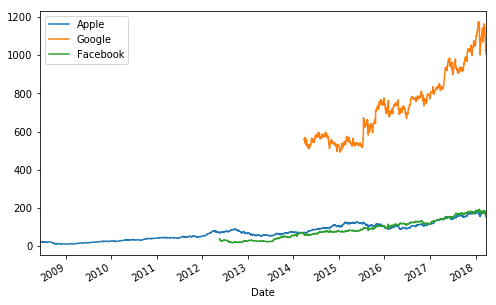

In [6]:
# plotting the graph to see what's going on
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 5) 
apple_close.plot(grid = True, label = 'Apple').legend()
google_close.plot(label = 'Google').legend()
facebook_close.plot(label = 'Facebook').legend()


In [7]:
# Combining these three stocks in one dataframe

stocks_with_nan = pd.DataFrame({'AAPL': apple_close,
                                'GOOG': google_close,
                                'FB': facebook_close})
stocks_with_nan.head(3)

,AAPL,FB,GOOG
Date,,,
2008-06-05,24.344395,NaN,NaN
2008-06-06,23.857327,NaN,NaN
2008-06-09,23.339416,NaN,NaN


In [8]:
# There are two columns that contain close prices, however, we will use Adjusted Close Prices as they are the final ones.
apple_close = pd.DataFrame(apple_close)
google_close = pd.DataFrame(google_close)
facebook_close = pd.DataFrame(facebook_close)

## Question 2

- Compute returns r_i = (P_{i+1} - P_{i}) / P_{i}, where i is today, and i + 1 is tomorrow
- So r_i represents the return of an investment buying / selling today (day i) to
selling / buying tomorrow (day i + 1).

- Can you compute some statistics on the return time series?
- For each stock
- What is its distribution? Gaussian, Student-t with \nu degrees of freedom?
- Is the distribution stationary over time?
(Hint: look for stationarity tests)
- Is there any auto-correlation in the time series?
- Is there any interesting relationships between the returns of different stocks at the same time
(contemporaneous) and not?
(Suggestion: look at correlation, Granger causality, PCA decomposition of returns

In [9]:
# Calculating the returns for each stock marker
# I tried to calculate the returns for all stocks simultaneously (applying the fuction directly to the 'stocks'), 
# but it didn't work out. Supposedly due to the nan values (FB and Google data doesn't have the whole 10-year-old-period info)

apple_return = apple_close.apply(lambda x: (x+1 - x)/ x)
google_return = google_close.apply(lambda x: (x+1 - x)/ x)
facebook_return = facebook_close.apply(lambda x: (x+1 - x)/ x)

# example
facebook_return.head()

,AdjClose
Date,
2018-03-27,0.006571
2018-03-26,0.006248
2018-03-23,0.006274
2018-03-22,0.006065
2018-03-21,0.005904


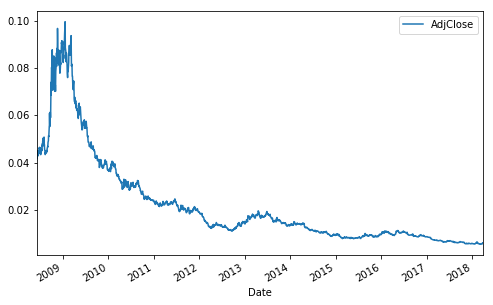

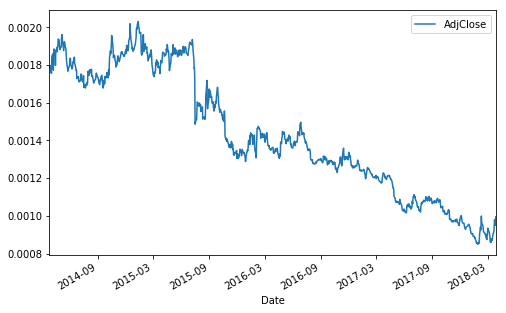

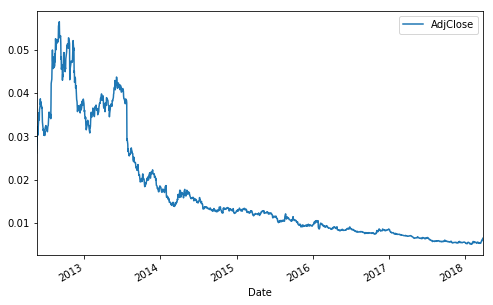

In [18]:
# Plotting the returns
apple_return.plot()
google_return.plot()
facebook_return.plot()

In [26]:
apple_close.describe()

,AdjClose
count,2468.000000
mean,75.293597
std,43.735742
min,10.049790
25%,40.404139
50%,70.918986
75%,107.177223
max,181.720000


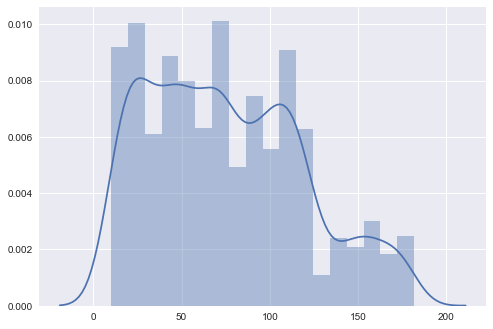

In [32]:
# distribution

import seaborn 

seaborn.distplot(apple_close)

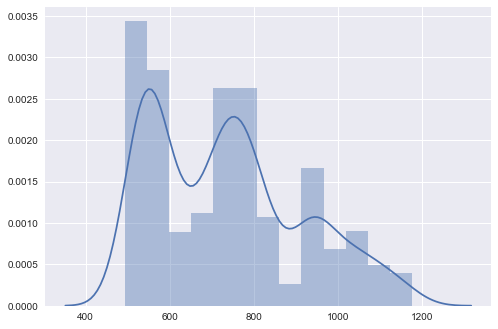

In [31]:
seaborn.distplot(google_close)

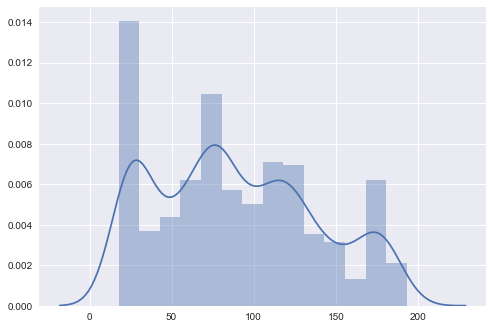

In [29]:
seaborn.distplot(facebook_close)

## Question 3

- Assume you have an equity strategy that every day makes a prediction f_i on the value of r_i

- The profit-and-loss (pnl) for each day is

pnl_i = f_i * r_i

- Assume that f_i is standard Gaussian with mean = 0 and std dev = 1

- Generate a few random realizations of f_i: plot pnl_i and pnl = cumsum(pnl_i)


## Question 4

- For a pnl timeseries Sharpe Ratio is defined as SR = E[pnl_i] / \sqrt{V[pnl_i]}

- Assume that f_i has a given hit rate = 1/n \sum_i I(sign(f_i) == sign(r_i))
- Hit rate is a measure of accuracy: how often we guess the direction of the stock movement correctly
- Remember that f_i is a random variable so you can draw different realizations of it
- What is the distribution of the SR(pnl_i) given f_i?
- Ideally you want to generate a plot varying hit_rate from 0 to 1.0 on the x-axis and computing
the corresponding distribution of SR on the y-axis
- Note that pnl_i is a random var since it is a function of the random variable f_i

- You can plot the distribution as a box plot or using just mean and std err


## Question 5

- What if instead of hit rate, you use root mean square error (RMSE) between f_i and r_i?
- How does the distribution of SR changes?
- What if you use mean absolute (MAD) of f_i and r_i?

- Make the code flexible to changing input measures (hit rate, RMSE, MAD) and output measures